# Image Features Extraction Package

## package doc: https://rempic.github.io/Image-Features-Extraction/
 



## Tutorial
This Python package allows the fast extraction and classification of features from a set of images. The resulting data frame can be used as training and testing set for machine learning classifier.


<img src="1.png">


This package was originally developed to extract measurements of single cell nuclei from microscopy images (see figure above). The package can be used to extract features from any set of images for a variety of applications.
Below it is shown a map of Boston used for city density and demographic models.

<img src="12.png">

## Features extraction for spatial classification of images

The image below shows a possible workflow for image feature extraction: two sets of images with different classification labels are used to produce two data sets for training and testing a classifier

<img src="2b.png">

<img src="3.png">

## An example of Collection-object and Iterator implementation

<img src="4b.png">


The object 'Image' includes the function Voronoi(), which returns the object Voronoi of my package Voronoi_Features.
The Voronoi object can be used to measure the voronoi tassels of each image regions. It includes >30 measurements.
Below an example of voronoi diagrams from the image shown above

<img src="09.png">


<img src="voro3.png">

## Image features extraction for city density and demographic analysis modelling

Create the Images root object and laod the images contained in the folder

../images/CITY/Boston_Center.tif


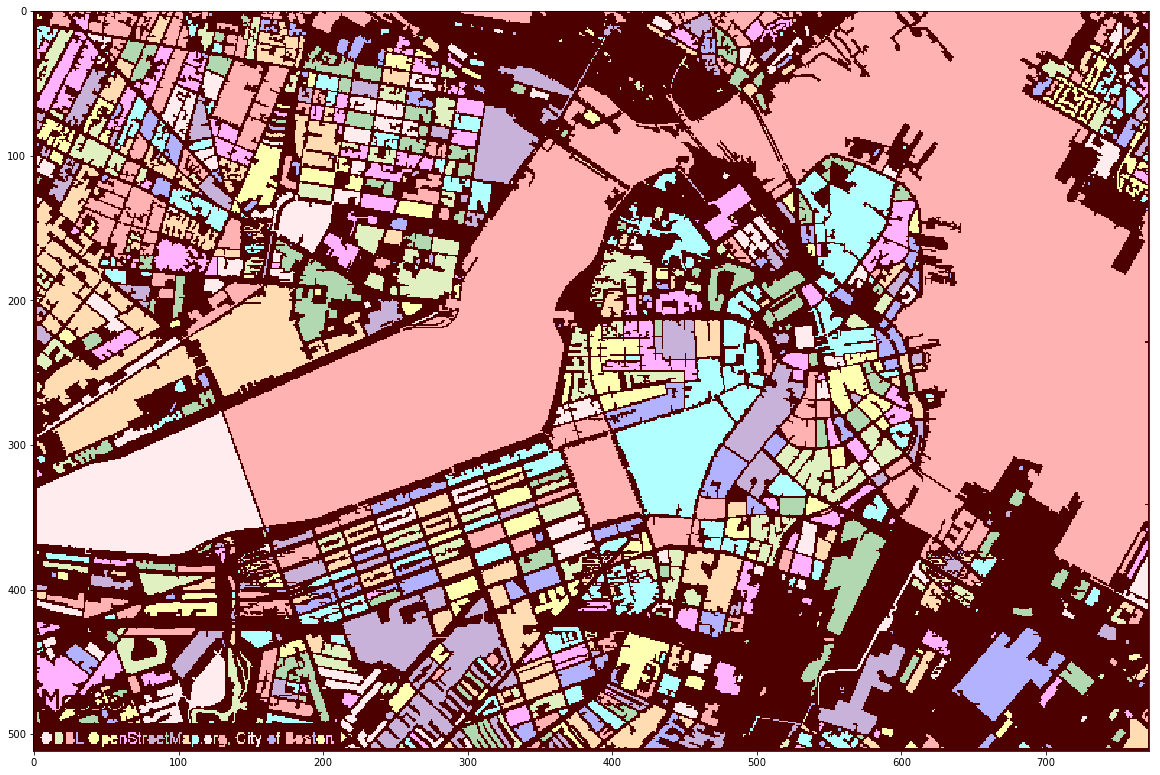

In [10]:
% matplotlib inline
import matplotlib.pyplot as plt

import image_features_extraction.Images as fe


IMGS = fe.Images('../images/CITY')

IMG = IMGS.item(0)


print(IMG.file_name())


fig, ax = plt.subplots(figsize=(20, 20))

ax.imshow(IMGS.item(0).get_image_segmentation())


In [7]:
features = IMG.features(['label', 'area','perimeter', 'centroid', 'moments'])

df2 = features.get_dataframe()

df2.head()

,id,label,area,perimeter,centroid_x,centroid_y,moments
0,0,44,4,4.000000,2.500000,122.500000,"[[4.0, 2.0, 2.0, 2.0], [2.0, 1.0, 1.0, 1.0], [..."
1,1,45,6,5.207107,4.333333,3.833333,"[[6.0, 8.0, 14.0, 26.0], [5.0, 8.0, 14.0, 26.0..."
2,2,46,64,36.556349,7.718750,34.015625,"[[64.0, 302.0, 1862.0, 13058.0], [385.0, 1857...."
3,3,47,29,23.520815,6.517241,146.689655,"[[29.0, 102.0, 476.0, 2580.0], [78.0, 305.0, 1..."
4,4,48,165,62.355339,10.121212,460.951515,"[[165.0, 1175.0, 10225.0, 99551.0], [1807.0, 1..."


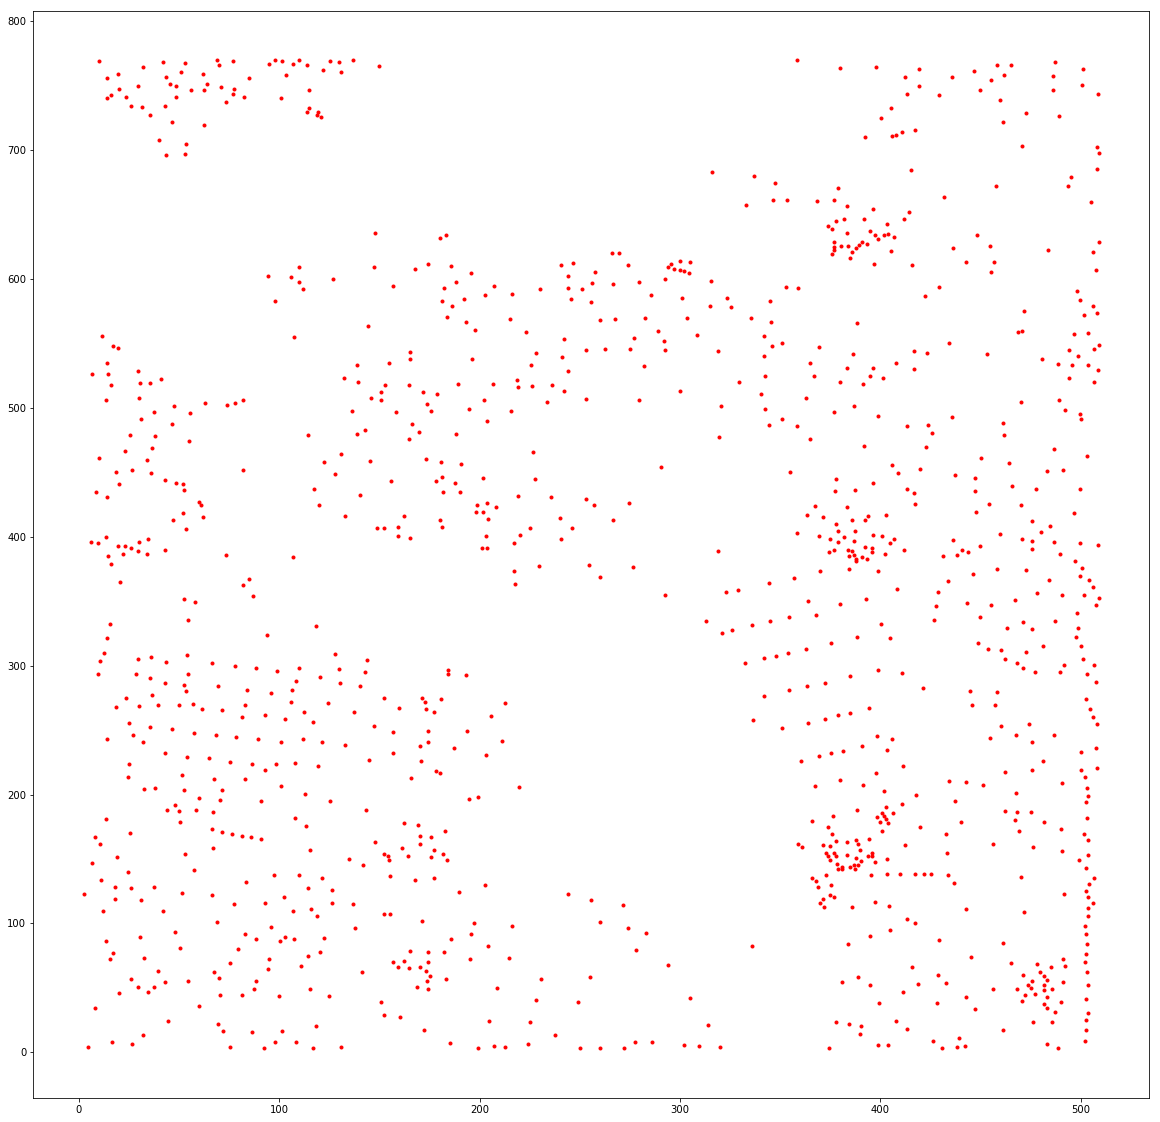

In [8]:
# SHOW THE FOUND CENTROIDS

fig, ax = plt.subplots(figsize=(20, 20))

plt.plot(df2.centroid_x,df2.centroid_y,'.r' )

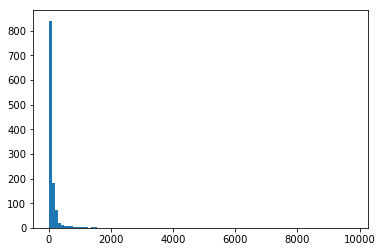

In [9]:
h = plt.hist(df2.area,100)

# Image features extraction for cellular spatial analysis

Images show cell nuclei

In [31]:
% matplotlib inline
import matplotlib.pyplot as plt

import image_features_extraction.Images as fe

    
IMGS = fe.Images('../images/CA/1')


# the iterator at work ...
for IMG in IMGS:
    print(IMG.file_name())
    


../images/CA/1/ORG_8bit.tif
../images/CA/1/ORG_bin.tif


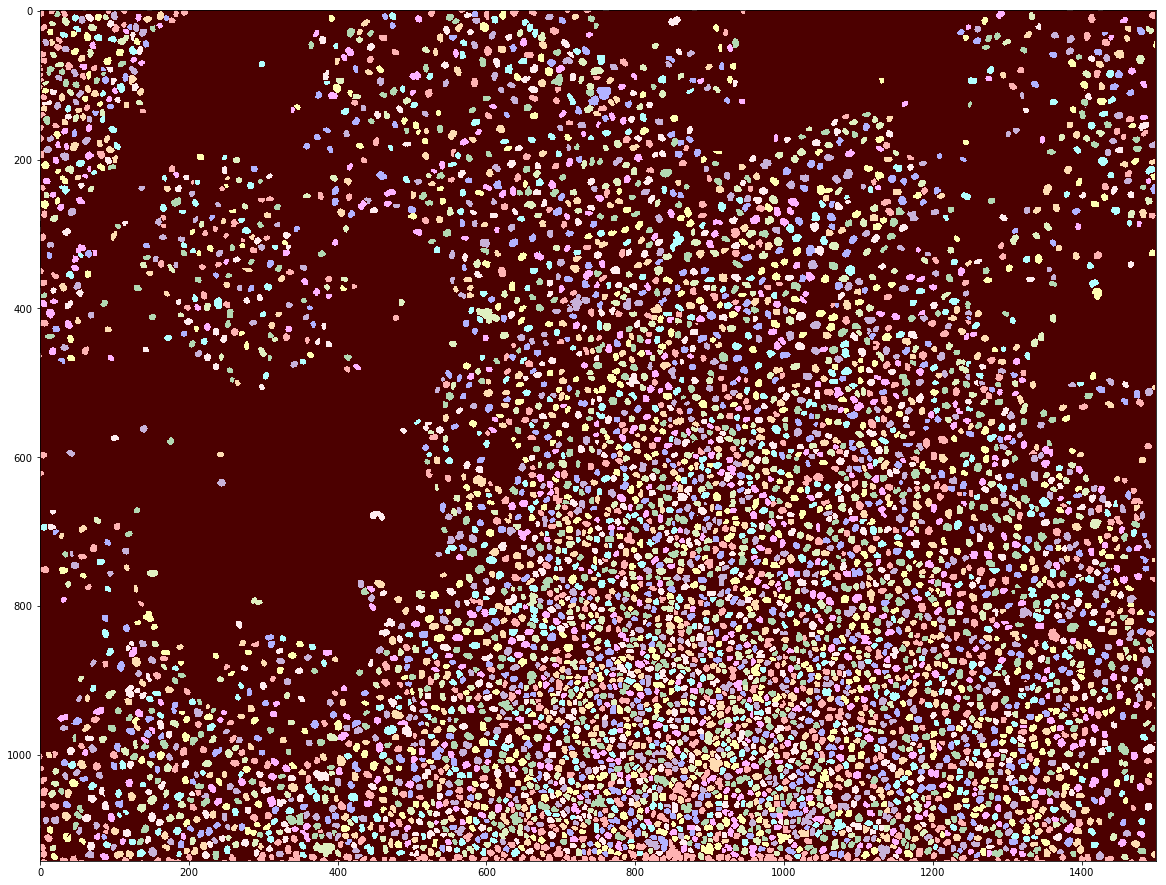

In [32]:

fig, ax = plt.subplots(figsize=(20, 20))

ax.imshow(IMGS.item(1).get_image_segmentation())


## An example of measurement and visualization of a property, e.g., area

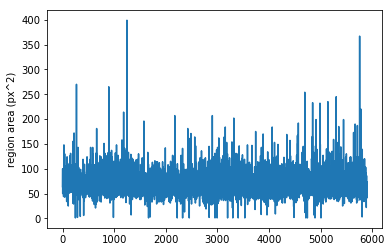

In [33]:
IMG = IMGS.item(1)


REGS = IMG.regions()


areas = REGS.prop_values('area')


plt.plot(areas)
plt.ylabel('region area (px^2)')

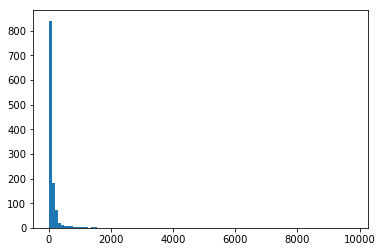

In [22]:
h = plt.hist(df2.area,100)

## VORONOI FEATURES

In [34]:
vor = IMG.Voronoi()

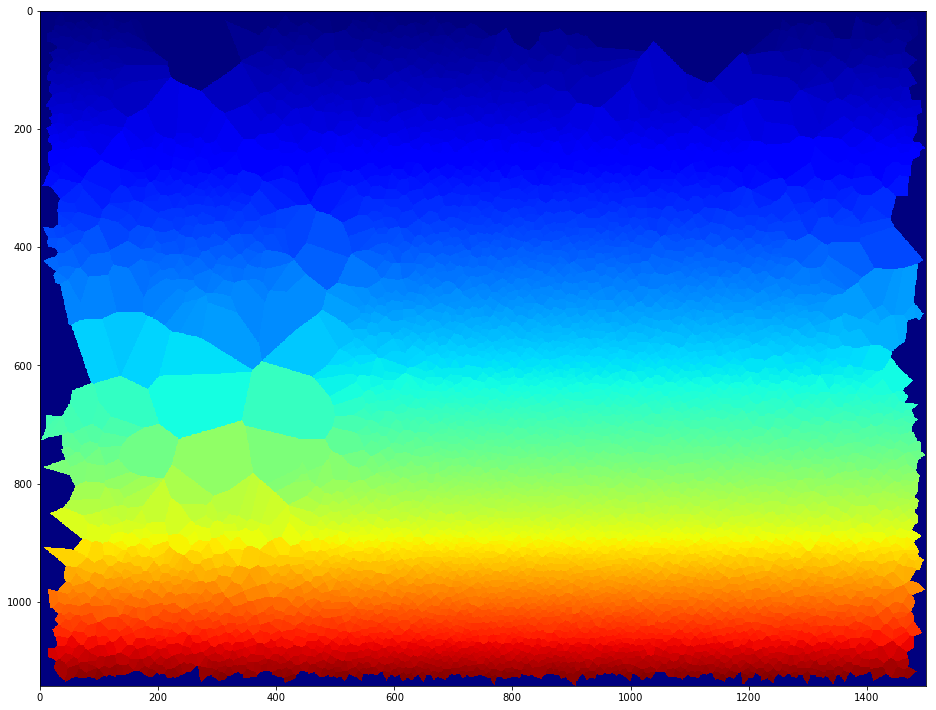

In [35]:
vor = IMG.Voronoi()
IMG_VOR = vor.get_voronoi_map()
fig = plt.figure(figsize=(20,20))
plt.imshow(IMG_VOR, cmap=plt.get_cmap('jet'))

In [36]:
i1 = IMGS.item(0).get_image_segmentation()
i2 = vor.get_voronoi_map()



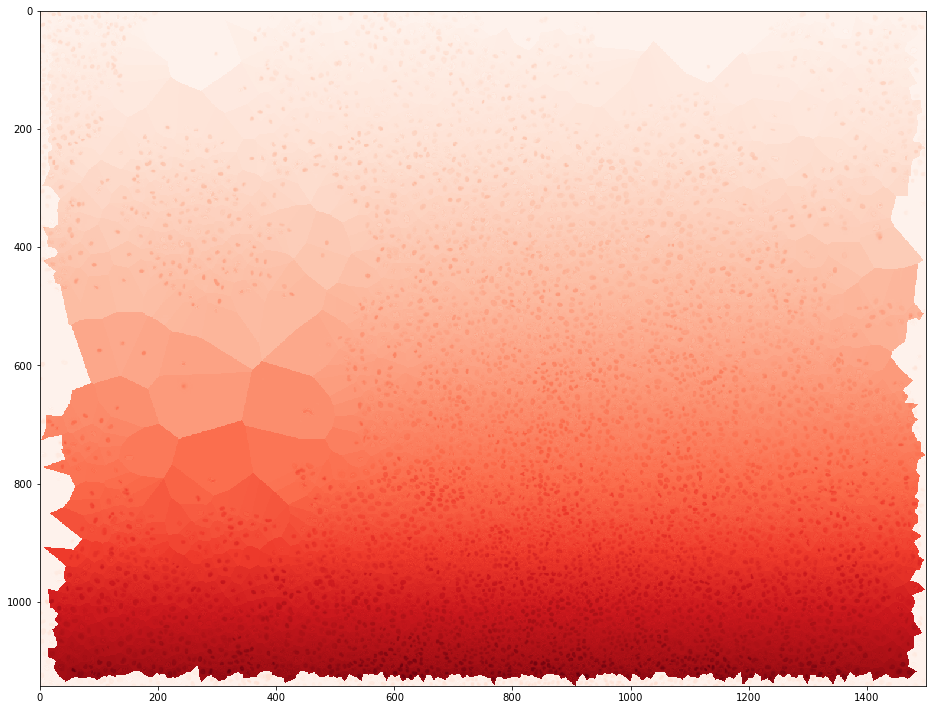

In [69]:
i3 = i1[:,:,0] + i2/1000
fig = plt.figure(figsize=(yinch,xinch))
plt.imshow(i3, cmap=plt.get_cmap('Reds'))

### Feature from the image only

In [15]:
features1 = IMG.features(['area','perimeter','centroid','bbox', 'eccentricity'])
features1.get_dataframe().head()

,id,area,perimeter,centroid_x,centroid_y,bbox,eccentricity
0,0,4,4.000000,2.500000,122.500000,"(2, 122, 4, 124)",0.000000
1,1,6,5.207107,4.333333,3.833333,"(3, 3, 6, 6)",0.738294
2,2,64,36.556349,7.718750,34.015625,"(3, 28, 14, 39)",0.410105
3,3,29,23.520815,6.517241,146.689655,"(3, 144, 11, 151)",0.736301
4,4,165,62.355339,10.121212,460.951515,"(3, 450, 19, 471)",0.718935


### Features from the voronoi diagram only

In [14]:
features2 = vor.features(['area','perimeter','centroid','bbox', 'eccentricity'])
features2.get_dataframe().head()

,id,voro_area,voro_perimeter,voro_centroid,voro_bbox,voro_eccentricity
0,24,314,71.112698,"(13.9203821656, 407.257961783)","(2, 395, 25, 416)",0.502220
1,33,365,78.526912,"(18.2, 481.273972603)","(2, 473, 32, 491)",0.861947
2,71,343,94.911688,"(17.8717201166, 723.320699708)","(3, 706, 30, 740)",0.955651
3,32,161,50.662951,"(15.7701863354, 450.565217391)","(5, 445, 24, 460)",0.738073
4,46,160,50.591883,"(15.8625, 516.75)","(5, 511, 24, 524)",0.782348


### Merge features from the image + the voronoi diagram 

In [18]:
features3 = features1.merge(features2, how_in='inner')
features3.get_dataframe().head()

,id,area,perimeter,centroid_x,centroid_y,bbox,eccentricity,voro_area,voro_perimeter,voro_centroid,voro_bbox,voro_eccentricity
0,8,147,95.041631,18.843537,151.149660,"(5, 146, 34, 157)",0.967212,257,67.355339,"(22.2762645914, 152.482490272)","(12, 143, 36, 162)",0.799861
1,15,485,279.260931,25.649485,170.092784,"(8, 155, 40, 188)",0.618654,447,80.325902,"(29.0604026846, 169.451901566)","(17, 157, 42, 185)",0.558628
2,17,114,69.562446,20.061404,747.701754,"(8, 739, 33, 753)",0.960308,73,31.798990,"(20.1369863014, 748.931506849)","(14, 744, 26, 754)",0.530465
3,18,106,48.556349,17.990566,119.075472,"(9, 114, 28, 125)",0.810733,151,48.763456,"(18.2185430464, 117.688741722)","(10, 109, 25, 124)",0.756768
4,21,2,0.000000,9.500000,395.000000,"(9, 395, 11, 396)",1.000000,63,33.349242,"(10.0158730159, 392.698412698)","(6, 387, 15, 400)",0.742086


### Add class name and value 

In [23]:
features3.set_class_name('class')
features3.set_class_value('test_class_val')

features3.get_dataframe(include_class=True).head()

,id,area,perimeter,centroid_x,centroid_y,bbox,eccentricity,voro_area,voro_perimeter,voro_centroid,voro_bbox,voro_eccentricity,class
0,8,147,95.041631,18.843537,151.149660,"(5, 146, 34, 157)",0.967212,257,67.355339,"(22.2762645914, 152.482490272)","(12, 143, 36, 162)",0.799861,test_class_val
1,15,485,279.260931,25.649485,170.092784,"(8, 155, 40, 188)",0.618654,447,80.325902,"(29.0604026846, 169.451901566)","(17, 157, 42, 185)",0.558628,test_class_val
2,17,114,69.562446,20.061404,747.701754,"(8, 739, 33, 753)",0.960308,73,31.798990,"(20.1369863014, 748.931506849)","(14, 744, 26, 754)",0.530465,test_class_val
3,18,106,48.556349,17.990566,119.075472,"(9, 114, 28, 125)",0.810733,151,48.763456,"(18.2185430464, 117.688741722)","(10, 109, 25, 124)",0.756768,test_class_val
4,21,2,0.000000,9.500000,395.000000,"(9, 395, 11, 396)",1.000000,63,33.349242,"(10.0158730159, 392.698412698)","(6, 387, 15, 400)",0.742086,test_class_val


## To measure intensity from image regions

The example below shows how to associate a grayscale image to a binary one for intensity measurement. The package uses intenally a very simple segmentation algorithm based on an Otsu Thresholding method for segmentation of binary images. The goal of the package in not to segment images but to measurement their segmented features. The corect way to use this package is by using as input pre-segmented binary images and if intensity measurement are needed you can assaciate the original grayscale image.

In [8]:
IMG = IMGS.item(1)

IMG.set_image_intensity(IMGS.item(0))

features = IMG.features(['label', 'area','perimeter', 'centroid', 'moments','mean_intensity'])

df = features.get_dataframe()

df.head()

,id,label,area,perimeter,centroid_x,centroid_y,moments,mean_intensity
0,0,22,64,28.278175,5.468750,584.375000,"[[64.0, 286.0, 1630.0, 10366.0], [280.0, 1223....",170.078125
1,1,23,86,33.556349,6.418605,621.546512,"[[86.0, 466.0, 3268.0, 25726.0], [391.0, 2067....",139.127907
2,2,24,100,35.556349,5.720000,1290.330000,"[[100.0, 472.0, 2988.0, 21442.0], [533.0, 2238...",99.360000
3,3,25,50,24.142136,5.600000,23.040000,"[[50.0, 180.0, 846.0, 4458.0], [202.0, 699.0, ...",181.940000
4,4,26,80,31.556349,7.325000,99.462500,"[[80.0, 426.0, 2894.0, 21846.0], [357.0, 1969....",157.675000


### Plot area vs perimeter and area histogram

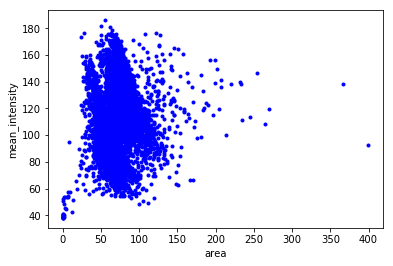

In [9]:

plt.plot(df.area, df.mean_intensity, '.b')
plt.xlabel('area')
plt.ylabel('mean_intensity')

## An example of how save measured features 

This package includes the class Features for data managment layer, which is used to separate the business from the data layer and allow easy scalability of the data layer. 
<img src="09.png">

In [10]:
import image_features_extraction.Images as fe

    
IMGS = fe.Images('../images/EDGE')

storage_name = '../images/DB1.csv'
class_value = 1

for IMG in IMGS:
    print(IMG.file_name())
    
    REGS = IMG.regions()
    
    FEATURES = REGS.features(['area','perimeter', 'extent', 'equivalent_diameter', 'eccentricity'], class_value=class_value)
    
    FEATURES.save(storage_name, type_storage='file', do_append=True)
    
    
    

../images/EDGE/ca_1.tif
../images/EDGE/ca_2.tif
../images/EDGE/ca_3.tif


# Pytest: Units test

In [11]:
!py.test


============================= test session starts ==============================
platform darwin -- Python 3.5.3, pytest-3.1.3, py-1.4.34, pluggy-0.4.0
rootdir: /Users/remi/Google Drive/INSIGHT PRJ/PRJ/Image-Features-Extraction, inifile:
collected 0 items 

========================= no tests ran in 0.01 seconds =========================
